# **Predicting Lung Disease Unsing Deep Learning**

Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [ ]:
!pwd

/Users/mybeast/Documents


In [ ]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

#we will create generic code which can be used for other base models as well
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #add image size and remove last layer to do binary classification(i.e imagenet contains about 1000 classes but here we have only two: neumonia or no neumonia)




58900480/58889256 [==============================] - 26s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes in order to kno how many output to expect
folders = glob('Datasets/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction) #create a model with vgg as input and output as prediction

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# compile model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/Users/mybeast/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 3461s 21s/step - loss: 0.2333 - accuracy: 0.9112 - val_loss: 0.2477 - val_accuracy: 0.9038
Epoch 2/5
163/163 [==============================] - 2407s 15s/step - loss: 0.1143 - accuracy: 0.9590 - val_loss: 0.4380 - val_accuracy: 0.8782
Epoch 3/5
163/163 [==============================] - 2128s 13s/step - loss: 0.0981 - accuracy: 0.9618 - val_loss: 0.2839 - val_accuracy: 0.9151
Epoch 4/5
163/163 [==============================] - 2122s 13s/step - loss: 0.0820 - accuracy: 0.9666 - val_loss: 0.2549 - val_accuracy: 0.9038
Epoch 5/5
163/163 [==============================] - 2100s 13s/step - loss: 0.0758 - accuracy: 0.9718 - val_loss: 0.4023 - val_accuracy: 0.8830


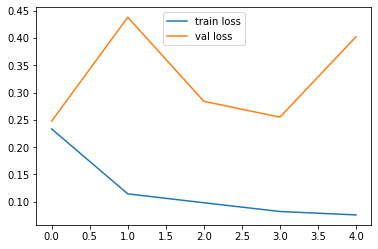

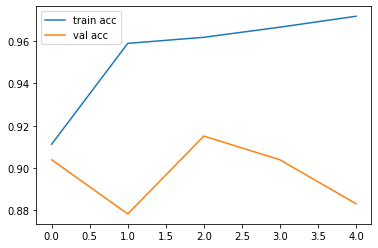

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

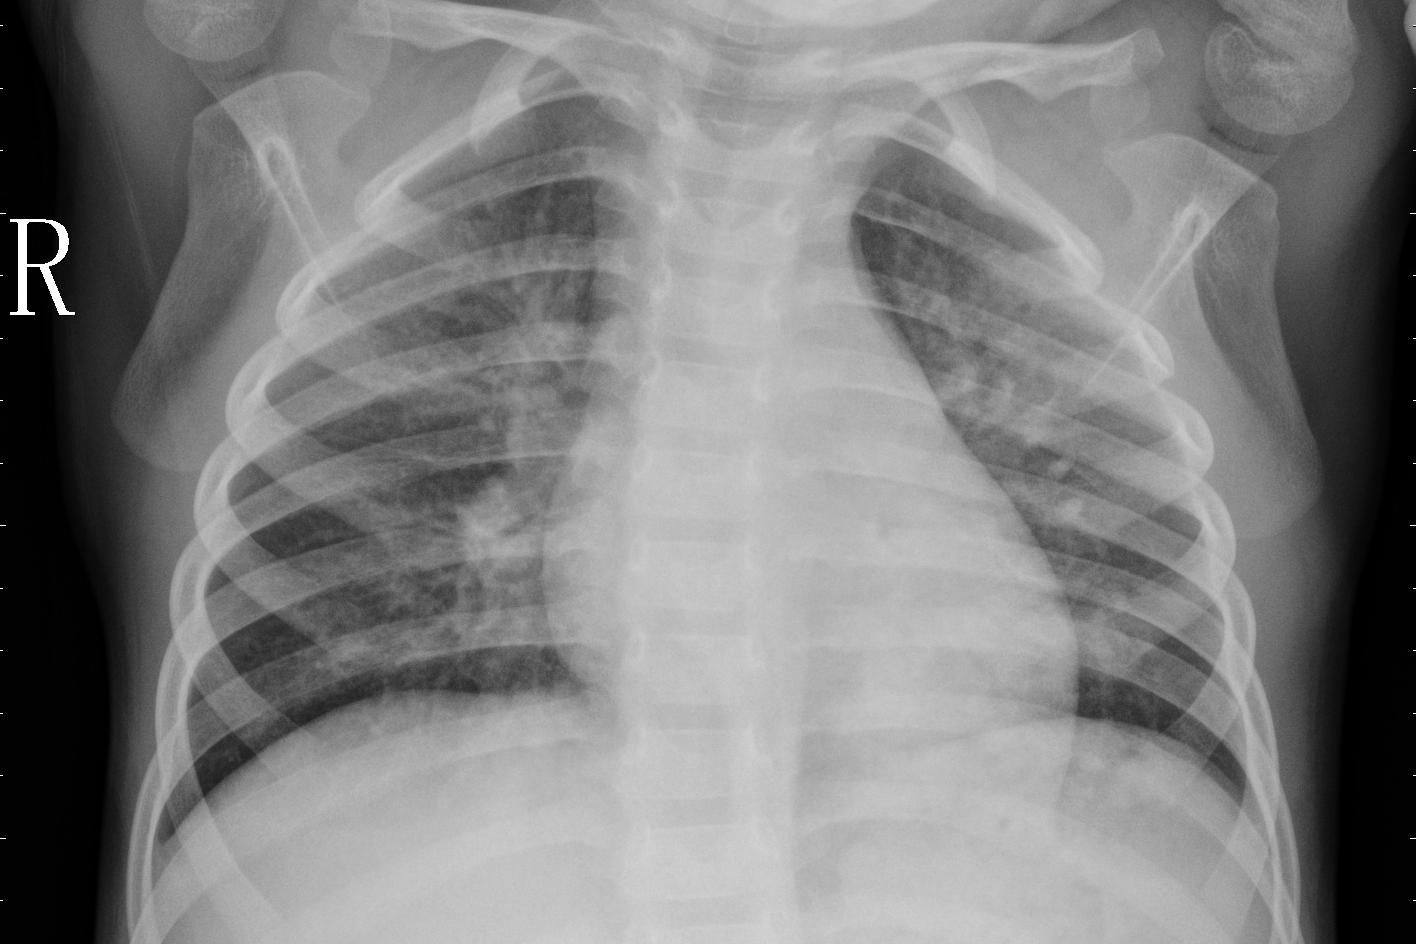

In [ ]:
from IPython.display import display
from PIL import Image


NeumonialPath="Datasets/val/PNEUMONIA/person1949_bacteria_4880.jpeg"
# NormalPath = "Datasets/val/NORMAL/NORMAL2-IM-1431-0001.jpeg"
display(Image.open(NeumonialPath))

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np


model = load_model('model_vgg16.h5')

img = image.load_img(NeumonialPath,target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes)
if classes[0][0] > classes[0][1]:
    print('X-Ray image is NORMAL')
else:
    print('X-Ray image is Having NEUMONIAL')

[[0. 1.]]
X-Ray image is Having NEUMONIAL
